In [31]:
# O objetivo deste exercício é utilizar uma base de dados para testar as amostragens e comparar os resultados

# carregue a base de dados credit_data.csv, que possui informações sobre empréstimos (se o cliente pagará ou não pagará o empréstimo)

# Teste cada uma das técnicas de amostragem, selecionando 1000 registros

# Para a amostragem estratificada, utilize o atributo 'c#default' para separar as categorias

# No final, faça o comparativo da média utilizando os atributos 'age', 'income' e 'loan'

In [32]:
# Importação das bibliotecas para analise de dados

import pandas as pd                                                # Analise e tratamento de dados
import numpy as np                                                 # Tratamento de dados numéricos
import random                                                      # Gerador de números aleatórios
import matplotlib.pyplot as plt                                    # Plotagem de gráficos
from sklearn.model_selection import StratifiedShuffleSplit         # importação de um modulo para gerar amostras estratificadas

In [33]:
# Carregamento da base de dados em uma variável

dados = pd.read_csv('../data/credit_data.csv')
# 'credit_data.csv' é um arquivo com alguns dados que possui informações sobre empréstimos (se o cliente pagará ou não pagará o empréstimo)

In [34]:
# Visualização da quantidade de registros

dados.shape

(2000, 5)

In [35]:
# Visualização dos primeiros registros do dataframe

dados.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [36]:
# Visualização dos últimos registros do dataframe

dados.tail()

,i#clientid,income,age,loan,c#default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


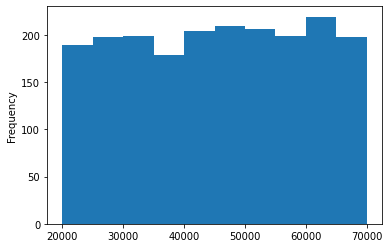

In [37]:
dados['income'].plot(kind='hist');

In [38]:
# definindo as funções para retirar as amostras 


# função para gerar amostras sistemáticas com espaço de (quantidade de registros/ quantidade de amostras)
def amostragem_sistematica(dados, amostras):
    intervalo = len(dados) // amostras                              # calcula o tamanho do intervalo
    random.seed(1)                                                  # semente aleatória
    inicio = random.randint(0, intervalo)                           # sorteia um número aleatório entre 0 e o tamanho do intervalo   
    indices = np.arange(inicio, len(dados), step = intervalo)       # geração de números aleatórios que serão os índices dos registros
    amostra_sistematica = dados.iloc[indices]                    # seleção dos registros com base nos índices

    return amostra_sistematica  


# função para gerar amostras por grupos
def amostragem_agrupamentos(dados, n_grupos):
    intervalo = len(dados) // n_grupos                  # calcula o tamanho do intervalo

    grupos = []                                         # lista vazia                      
    id_grupo = 0                                        # variavel auxiliar id do grupo
    contagem = 0                                        # variavel auxiliar contador de registros
    for _ in dados.iterrows():                          # iteração sobre os registros da base de dados   
        grupos.append(id_grupo)                         # adiciona o id do grupo
        contagem += 1                                   # incrementa a contagem +1
        if contagem > intervalo:                        # se a contagem for maior que a divisão da quantidade de registros por 10
            contagem = 0                                # zera a contagem para o próximo grupo
            id_grupo += 1                               # incrementa o id do grupo +1

    dados['grupo'] = grupos                             # adiciona o grupo ao dataframe
    random.seed(1)                                      # semente aleatória
    grupo_selecionado = random.randint(0, n_grupos)     # sorteia um número aleatório entre 0 e o número de grupos
    return dados[dados['grupo'] == grupo_selecionado]   # retorna os registros do grupo selecionado


# função para gerar amostras estratificadas
def amostragem_estratificada(dados, percentual):
  split = StratifiedShuffleSplit(test_size=percentual, random_state=1)
  for _, y in split.split(dados, dados['c#default']):
    df_y = dados.iloc[y]
  return df_y


# função para gerar amostras de reservatório
def amostragem_reservatorio(dados, amostras):
    stream = []
    for i in range(len(dados)):                              # iteração sobre os registros da base de dados
        stream.append(i)                                     # adiciona um indice para cada registro
    
    i = 0                                                    # variavel auxiliar para o indice
    tamanho = len(stream)                                    # variavel tamanho para ter a quantidade de registros

    reservatorio = [0] * amostras                            # onde serão armazenados os inidices dos registros sorteados
    for i in range(amostras):                                # iteração para gerar os registros sorteados
        reservatorio[i] = stream[i]                          # adiciona os inidices dos registros sorteados
                                            
    while i < tamanho:                                       # iteração para selecionar os registros 
        j = random.randrange(i + 1)                          # sorteia um número aleatório entre i + 1
        if j < amostras:
            reservatorio[j] = stream[i]                      # onde ficarão armazenados oa valores sorteados
        i += 1                                               # incrementa o contador
    
    return dados.iloc[reservatorio]                          # retorna os registros sorteados pelo algoritmo de amostragem de reservatório                                    

In [39]:
# calcula a quantidade de amostras estratificadas

1000 / len(dados)

0.5

In [40]:
# Amostragem aleatória simples
df_amostra_aleatoria_simples = dados.sample(n = 1000, random_state = 1)  # 1000 registros, random_state = 1(semente aleatória geradora) vai sortear os mesmos registros

# uso da função para gerar amostras sistemáticas com 1000 amostras
df_amostra_sistematica = amostragem_sistematica(dados, 1000)

# uso da função para gerar amostras por grupos com 1000 grupos
df_amostra_agrupamento = amostragem_agrupamentos(dados, 1000)

# geração de amostras estratificadas
df_amostra_estratificada = amostragem_estratificada(dados, 0.5)

# uso da função para gerar amostras de reservatório com 1000 amostras
df_amostragem_reservatorio = amostragem_reservatorio(dados, 1000)


In [41]:
# comparativo dos resultados 

In [42]:
amostras = {'media geral': dados.mean(),
            'amostra simples': df_amostra_aleatoria_simples.mean(),
            'amostra sistematica': df_amostra_sistematica.mean(),
            'amostra agrupamento': df_amostra_agrupamento.mean(),
            'amostra estratificada': df_amostra_estratificada.mean(),
            'amostra reservatório': df_amostragem_reservatorio.mean()}

In [43]:
# média da variavel age(idade), loan, icome(renda) em todos os registros

print('Média idade :', dados['age'].mean(), '\nMédia loan :',dados['loan'].mean(), '\nMédia renda :', dados['income'].mean())

Média idade : 40.80755937840458 
Média loan : 4444.369694688262 
Média renda : 45331.60001779333


In [44]:
# média da variavel age(idade), loan, icome(renda) usando a amostra simples

print('Média idade :', df_amostra_aleatoria_simples['age'].mean(), '\nMédia loan :',df_amostra_aleatoria_simples['loan'].mean(), '\nMédia renda :', df_amostra_aleatoria_simples['income'].mean())

Média idade : 40.49552561124429 
Média loan : 4449.4469004423645 
Média renda : 45563.26865376901


In [45]:
# média da variavel age(idade), loan, icome(renda) usando a amostra sistematica

print('Média idade :', df_amostra_sistematica['age'].mean(), '\nMédia loan :',df_amostra_sistematica['loan'].mean(), '\nMédia renda :', df_amostra_sistematica['income'].mean())

Média idade : 40.91117381141754 
Média loan : 4506.787976426329 
Média renda : 45691.49875066951


In [46]:
# média da variavel age(idade), loan, icome(renda) usando a amostra por agrupamento

print('Média idade :', df_amostra_agrupamento['age'].mean(), '\nMédia loan :',df_amostra_agrupamento['loan'].mean(), '\nMédia renda :', df_amostra_agrupamento['income'].mean())

Média idade : 43.83142139948904 
Média loan : 4846.595734472186 
Média renda : 39520.903173058


In [47]:
# média da variavel age(idade), loan, icome(renda) usando a amostra estratificada

print('Média idade :', df_amostra_estratificada['age'].mean(), '\nMédia loan :',df_amostra_estratificada['loan'].mean(), '\nMédia renda :', df_amostra_estratificada['income'].mean())

Média idade : 40.53363707173919 
Média loan : 4423.744651094196 
Média renda : 45101.36675026739


In [48]:
# média da variavel age(idade), loan, icome(renda) usando a amostra por reservatório

print('Média idade :', df_amostragem_reservatorio['age'].mean(), '\nMédia loan :',df_amostragem_reservatorio['loan'].mean(), '\nMédia renda :', df_amostragem_reservatorio['income'].mean())

Média idade : 40.57203708208336 
Média loan : 4429.634971370371 
Média renda : 45111.19429734541


In [49]:
# criação de um dataframe para armazenar os resultados

resultados = pd.DataFrame(amostras)
resultados = resultados.T                    # transposição do dataframe

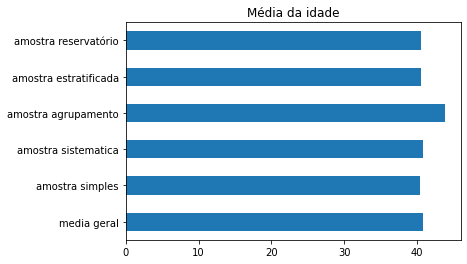

In [50]:
# visualização dos resultados graficamente idade

resultados['age'].plot(kind='barh'), 
plt.title('Média da idade')
plt.show()

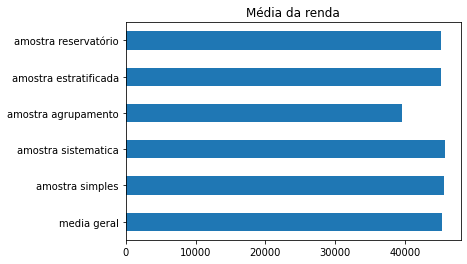

In [51]:
# visualização dos resultados graficamente income

resultados['income'].plot(kind='barh'), 
plt.title('Média da renda')
plt.show()

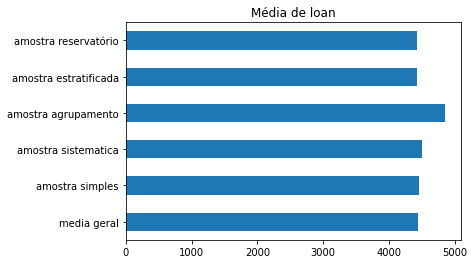

In [52]:
# visualização dos resultados graficamente loan

resultados['loan'].plot(kind='barh'), 
plt.title('Média de loan')
plt.show()